# CW 12
Gwyneth and Amelia

Consider a ball of mass $m$ with horizontal coordinate $x$ rolling in a double-well potential $V(x) = x^4/4 - x^2/2$. (This is sometimes called the "sombrero" potential. Plot it to see why, for $x\in[-1.5,1.5]$.) This potential produces a force $f_{\text{hat}}(x) = -V'(x) = -x^3 + x$ on the rolling ball. Suppose the ball also has slight friction, so experiences a drag force $f_{\text{drag}}(\dot{x}) = -\nu \dot{x}$. With these forces we thus expect the ball to roll down the sides of the sombrero potential and settle in one of the two stable wells. However, this is boring, so instead we are going to shake the hat back and force periodically with a driving force $f_{\text{drive}}(t) = F\cos(\omega t)$. For small driving forces $F$, this should simply jiggle the ball back and forth at the bottom of one of the stable wells. Our task will be to explore what happens for larger driving forces $F$.

Note that according to Newton's second law, the ball must satisfy the equation of motion: $$m\ddot{x} = f_{\text{hat}}(x) + f_{\text{drag}}(\dot{x}) + f_{\text{drive}}(t) = x - x^3 - \nu \dot{x} + F\cos(\omega t)$$ This system is known as a periodically driven nonlinear "Duffing oscillator," and can be split into a set of two coupled first-order ODEs: $$\dot{x}(t) = y(t)$$ $$m\dot{y}(t) = -\nu y(t) + x(t) - x^3(t) + F\cos(\omega t)$$ Your task will be to solve these equations numerically, for $m=1$, $\nu = 0.25$, and $\omega = 1$. Use a time-step size of $\Delta t = 0.001$ with the 4th-order Runge-Kutta integration method to keep sufficient numerical precision. Implement your code in a python file sombrero.py with suitable test functions in test_sombrero.py.

Write a report in a notebook cw12-duffing.ipynb that summarizes the following investigations.

For $F = 0.18$, plot $x(t)$ for $t\in[0,2\pi, 50]$, with $x(0) = -0.9$ and $y(0) = 0$. Plot the parametric curve $(x(t),y(t))$ in the x-y plane for the same time range. Plot a scatter plot of the points $(x(t),y(t))$, with specific $t = n 2\pi$ for $n = 0,1,\ldots,50$. (This last type of plot is known as a "Poincare section" of the parametric curve.) Interpret your results.
Repeat the first question, but for $x(0) = 0.9$ and $y(0) = 0$. What is different? Interpret your results.
Repeat the first question, but for $F = 0.25$, $x(0) = 0.2$, and $y(0) = 0.1$. What is different? Plot what happens if you change to $x(0) = 0.201$. How do you interpret this physically?
Repeat the first question, but for $F = 0.4$, $x(0) = 0$, and $y(0) = 0$. What is different now? What happens when you tweak the initial conditions? How do you interpret this physically?
For the previous problem, extend the time range to $t\in[0,2\pi, 1000]$. What is the structure of the Poincare section?
Your homework this week will be to finish this classwork assignment, and then use it to create high-resolution plots of the Poincare section.

In [1]:
import sombrero as sb
import matplotlib.pyplot as plt
import numba as nb
import numpy as np

### Sombrero Plot
This is the Sombrero plot so that you can see how the equation for V(x) is graphed. This is what we will be investigating further in the line and scatter plot graphs.

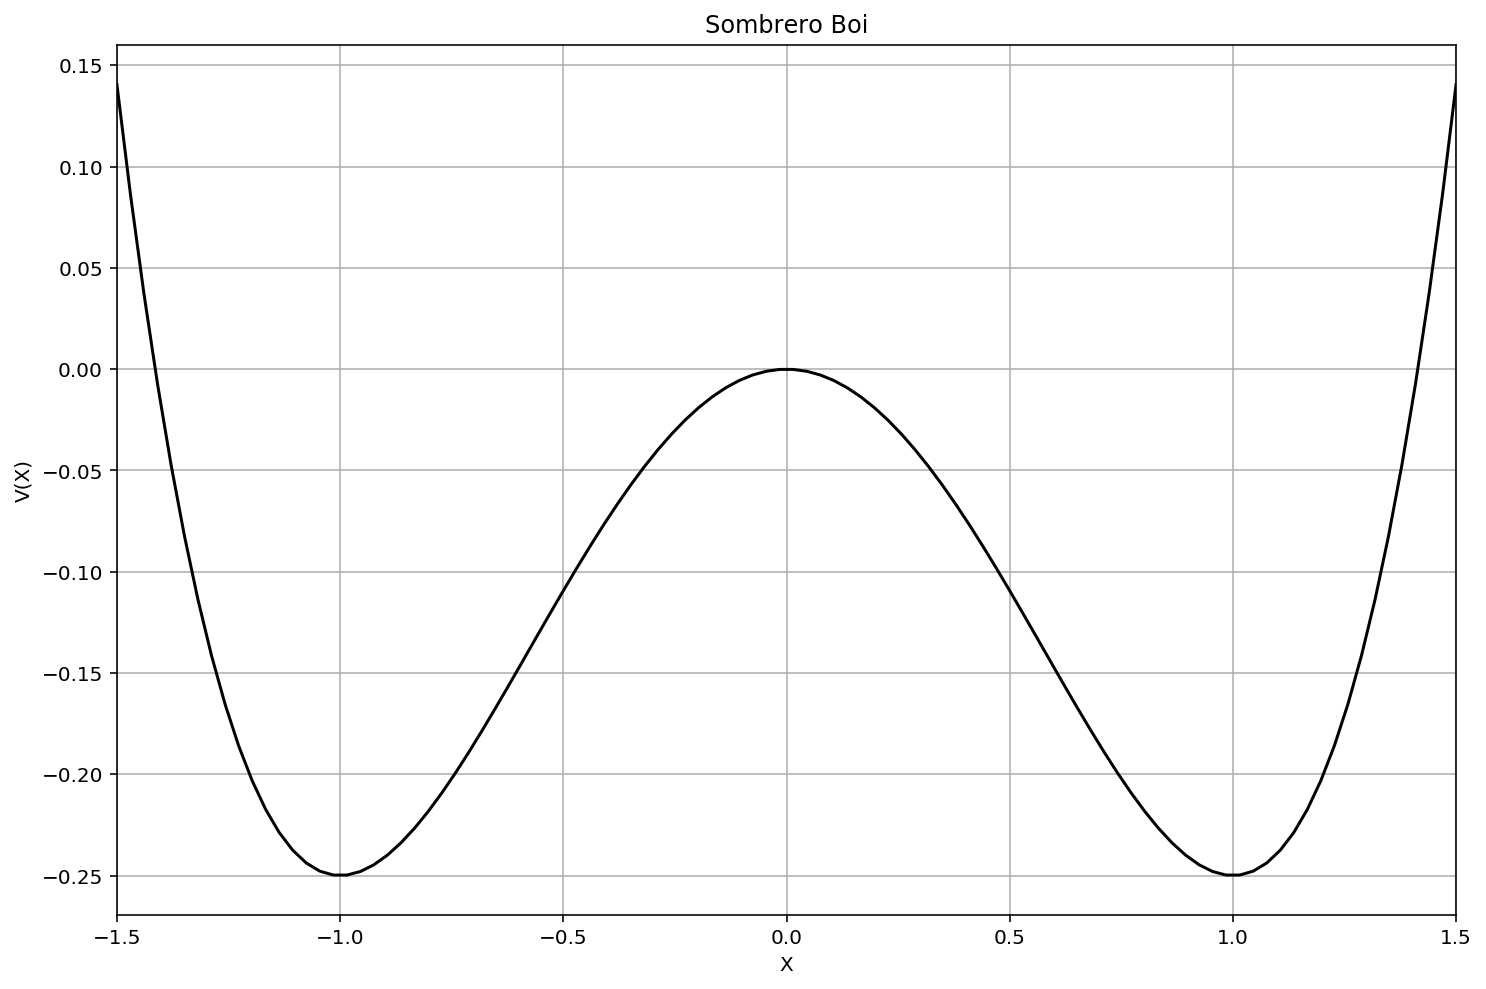

In [2]:
x = np.linspace(-1.5,1.5,100)
v = (x**4)/4 - (x**2)/2

plot = plt.figure(figsize=(12,8))
sombreroboi = plt.axes()
sombreroboi.grid(True)
sombreroboi.plot(x, v, color = "black")
sombreroboi.set(xlabel = "X", ylabel = "V(X)", title = "Sombrero Boi")
sombreroboi.set(xlim = (-1.5,1.5))
plt.show()

## Time for those Line and Scatter's... am I right?
Here we will be graphing the line and scatter plots that investigate sombrero further. Quite exciting.

### Plot 1
This plot will use $F = 0.18$, plot $x(t)$ for $t\in[0,2\pi, 50]$, with $x(0) = -0.9$ and $y(0) = 0$. Enjoy the results!

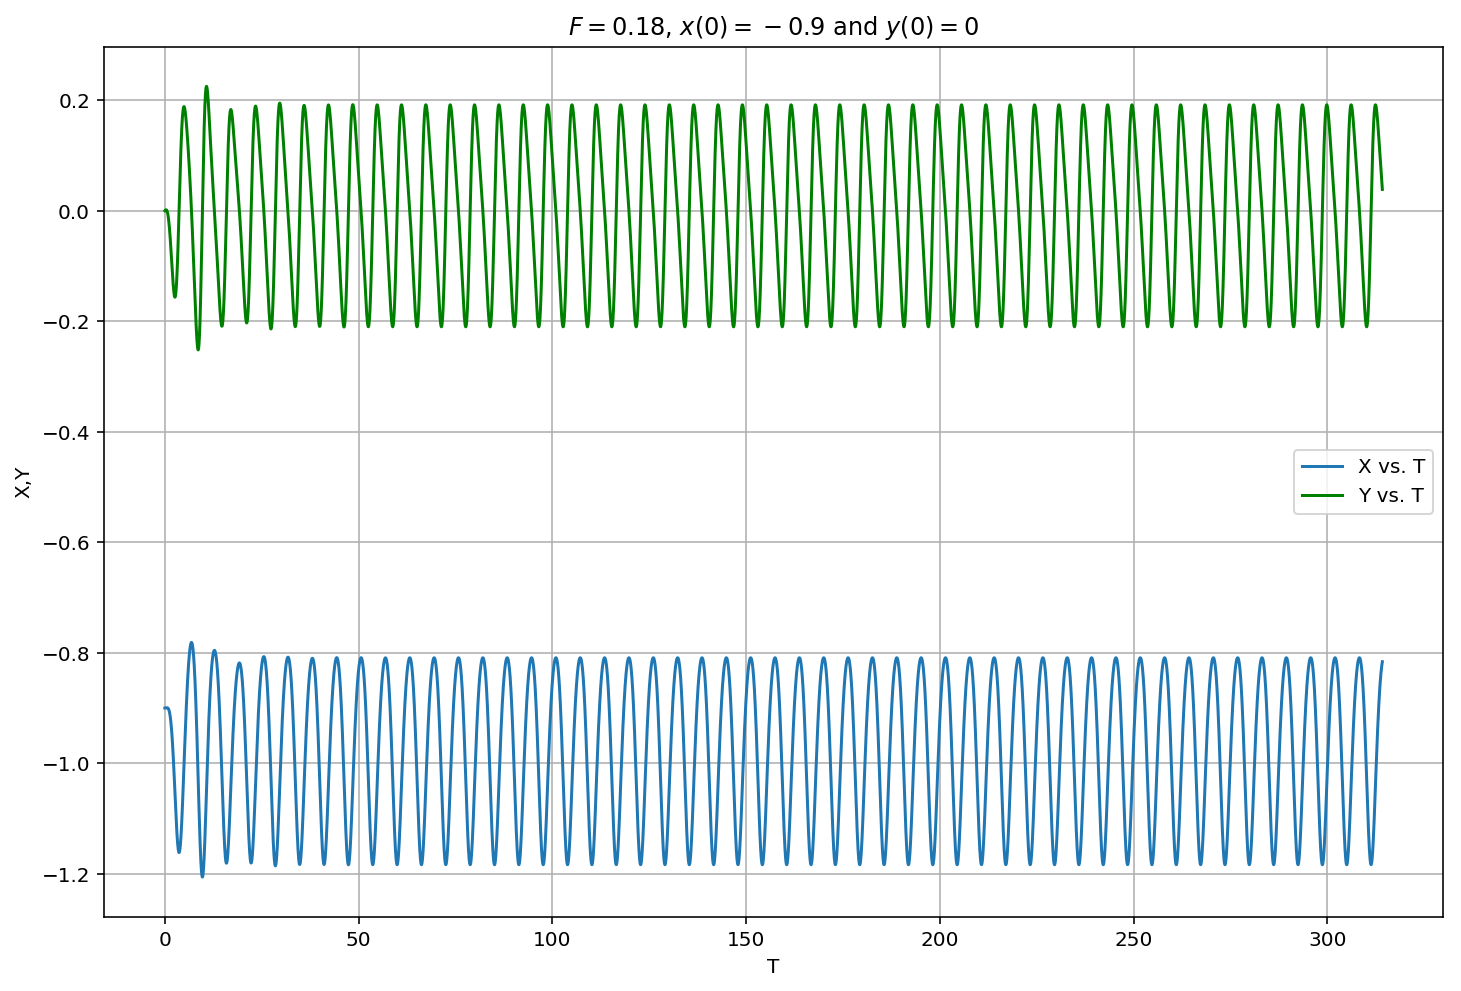

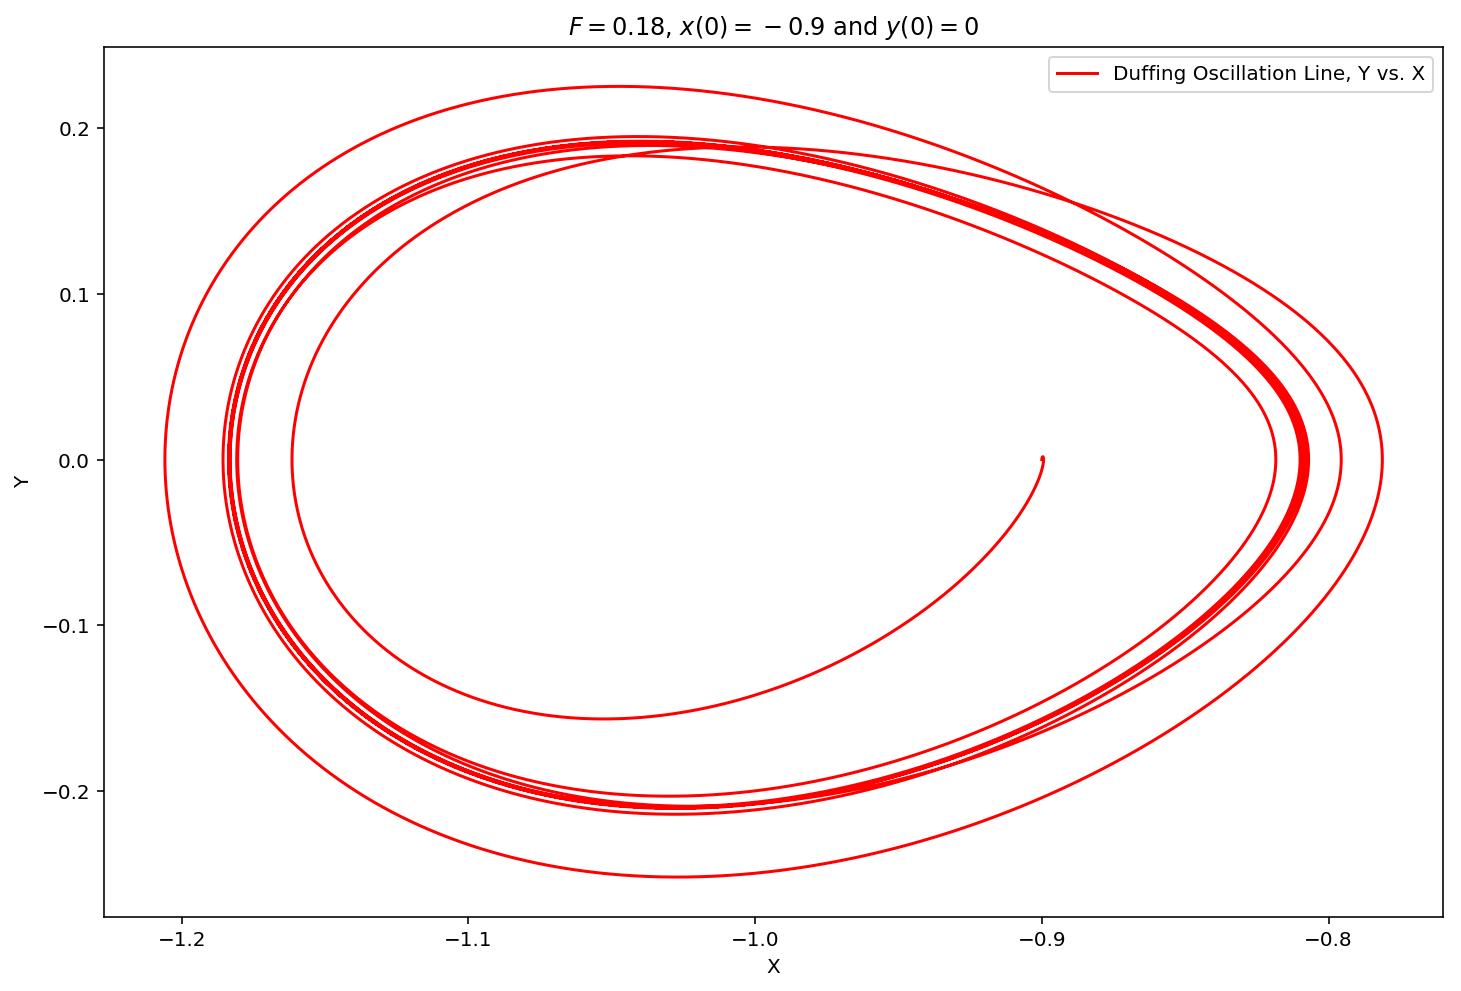

In [3]:
#plot of line
@nb.jit
def graphofline(sol, F, title, t):
    """Graphs runge4thorder onto a line"""
    
    plot = plt.figure(figsize=(12,8))
    plt.plot(t, sol[:,0], label="X vs. T")
    plt.plot(t, sol[:,1], label="Y vs. T", c='g')
    plt.title(title)
    plt.xlabel("T")
    plt.ylabel("X,Y")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plot = plt.figure(figsize=(12,8))
    plt.plot(sol[:,0], sol[:,1], label="Duffing Oscillation Line, Y vs. X", c= 'r')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

t,sol = sb.runge4thorder(0.18, -0.9, 0, 50)
graphofline(sol, 0.18, "$F = 0.18$, $x(0) = -0.9$ and $y(0) = 0$", t)

In [4]:
#now for the scatter plot
#@nb.jit
def scatter(points, F, title, t):
    """Graphs runge4thorder on scatter"""
    
    plot = plt.figure(figsize=(12,8))
    plt.scatter(points[:,0], points[:,1], label="Duffing Oscillation Scatter", s=1)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()




t, points = sb.runge4thorder(0.18, -0.9, 0, 50)
points = np.array([points[::6283*(u),:] for u in range(50)])
newpoints = points[::6283,:]
scatter(newpoints, 0.18, 0.18, "$F=0.18$, $x(0) = -0.9$, $y(0)= 0$", t)

#scatter(np.array([points[:,0], points[:,1]]), 0.18, "$F=0.18$, $x(0) = -0.9$, $y(0)= 0$", t)


ValueError: slice step cannot be zero